Import Modules


In [694]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Preprocessing and Dimensionality Reduction
from sklearn.preprocessing import StandardScaler

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import (
    accuracy_score, f1_score, ConfusionMatrixDisplay,roc_auc_score,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

In [695]:
df=pd.read_csv('Student Depression Dataset.csv')
df.head(1)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [696]:
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
gender_map={'Male':0,'Female':1}
age_group_map = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-60': 4}
cgpa_map = {'Low CGPA': 0, 'Below Average CGPA': 1, 'Average CGPA': 2, 'High CGPA': 3}
sleep_duration_map = {'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3, 'Others': 4}
dietary_habits_map = {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2, 'Others': 3}
yes_no_map = {'Yes': 1, 'No': 0}

In [697]:
df.shape

(27901, 18)

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [699]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Exploratory Data Analysis (EDA)

Analyze the dataset to understand its structure and quality

In [700]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Explore Data Distributions:

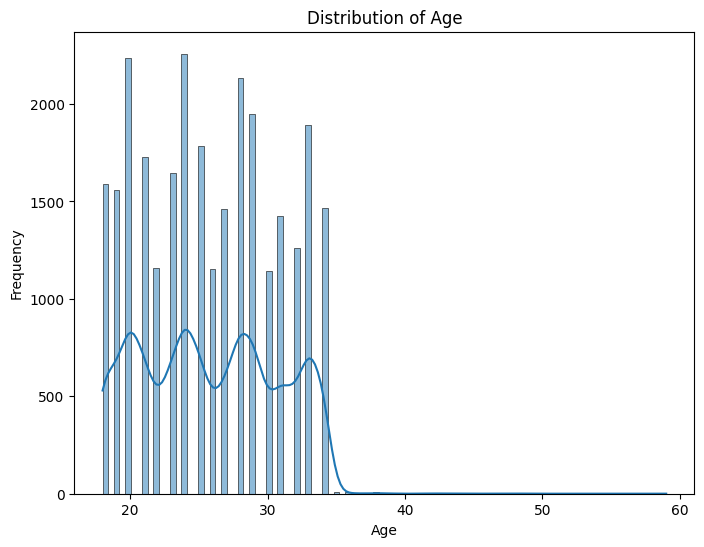

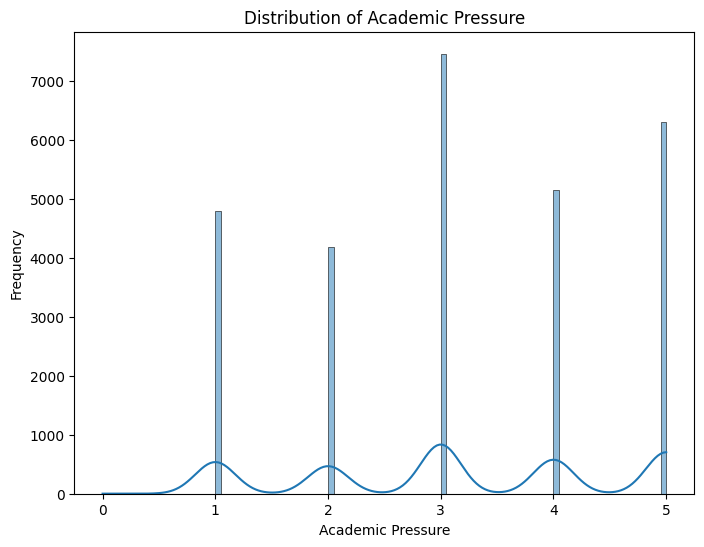

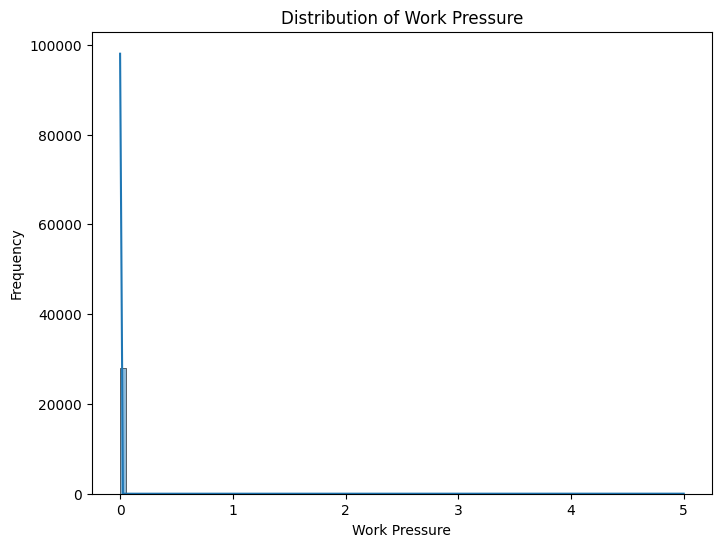

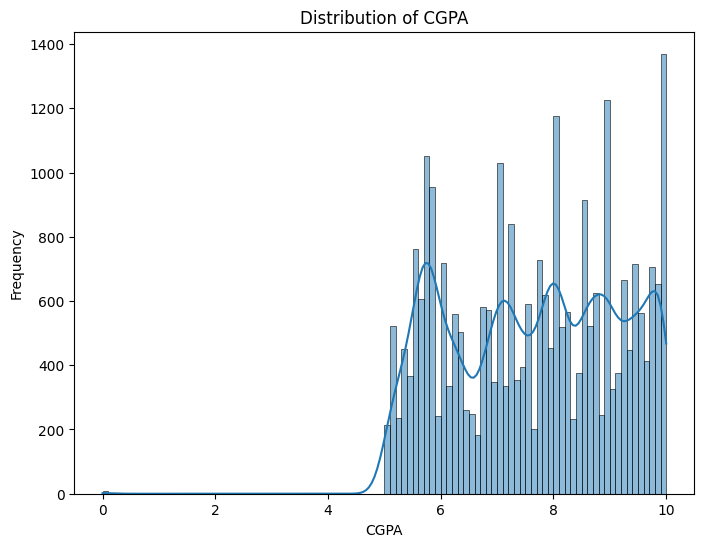

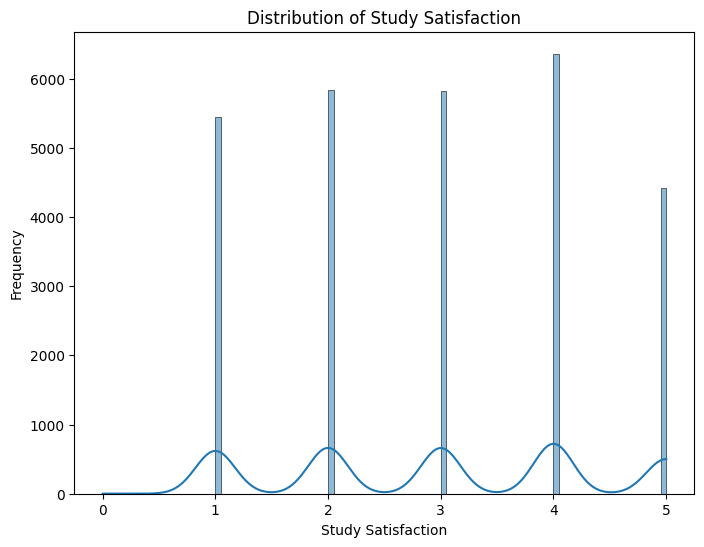

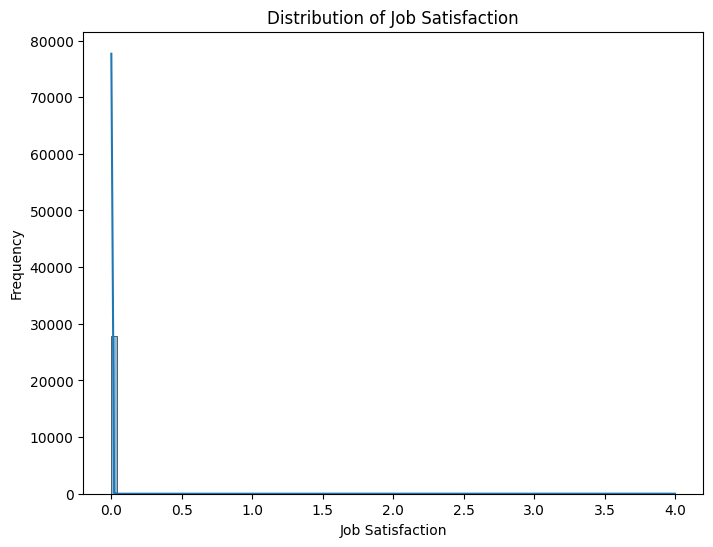

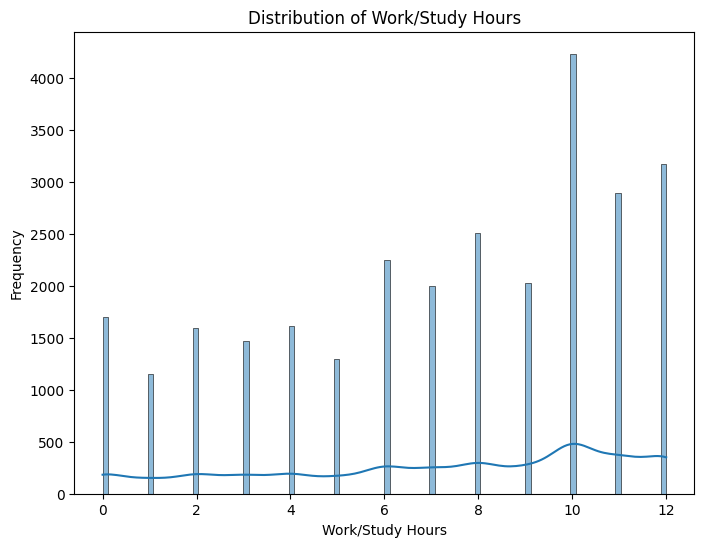

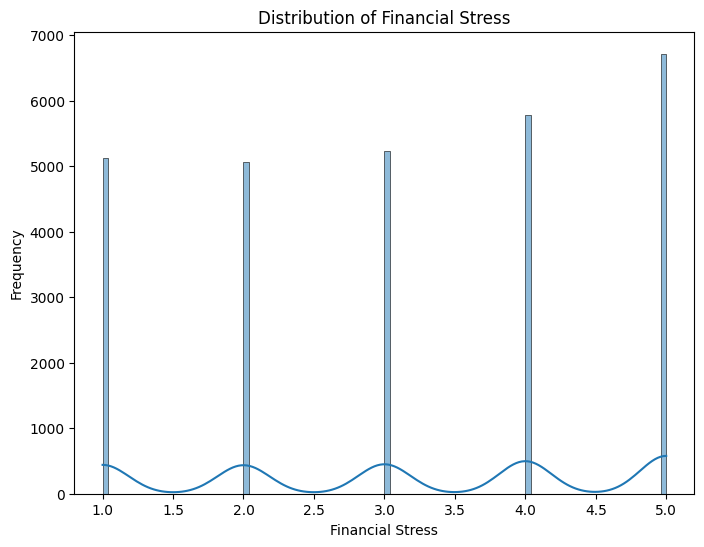

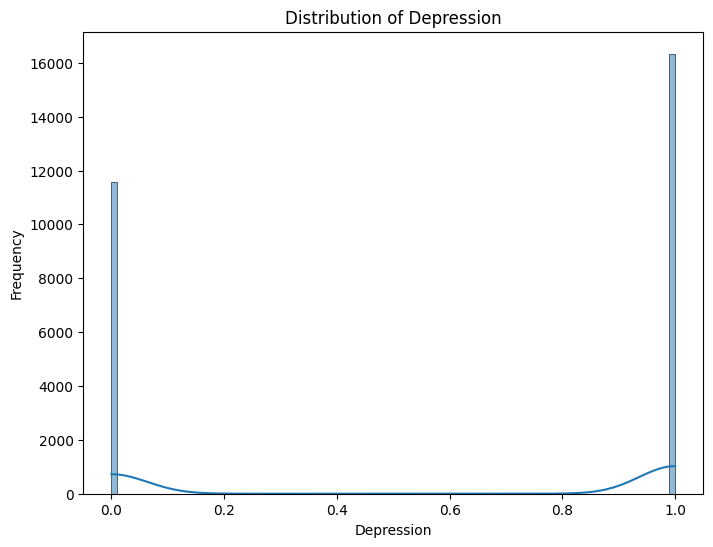

In [701]:
#numerical columns analysis
for col in numerical_cols:
    plt.figure(figsize=(8,6))

    if col=='Age' or 'CGPA':
        sns.histplot(df[col],kde=True,bins=100)
    elif col in ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction','Depression']:
        sns.histplot(df[col],kde=False,bins=5)
    elif col == 'Work/Study Hours':
        sns.histplot(df[col], kde=True, bins=12)
    elif col == 'Financial Stress':
        sns.histplot(df[col], kde=True, bins=5)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

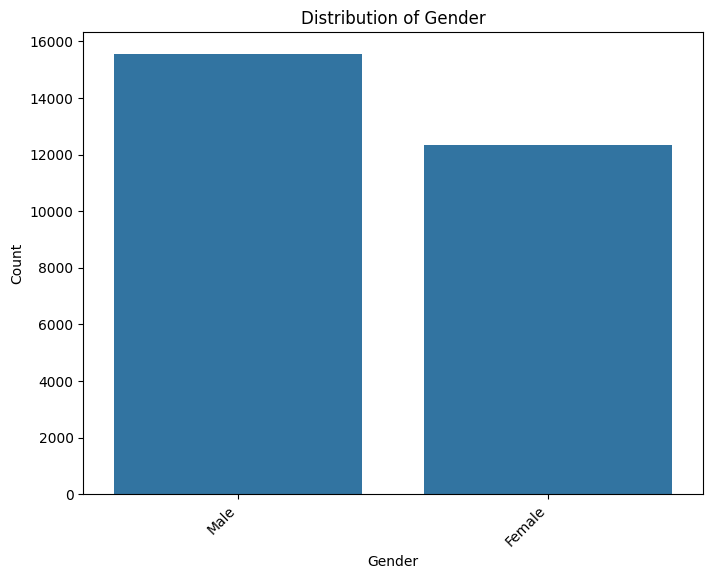

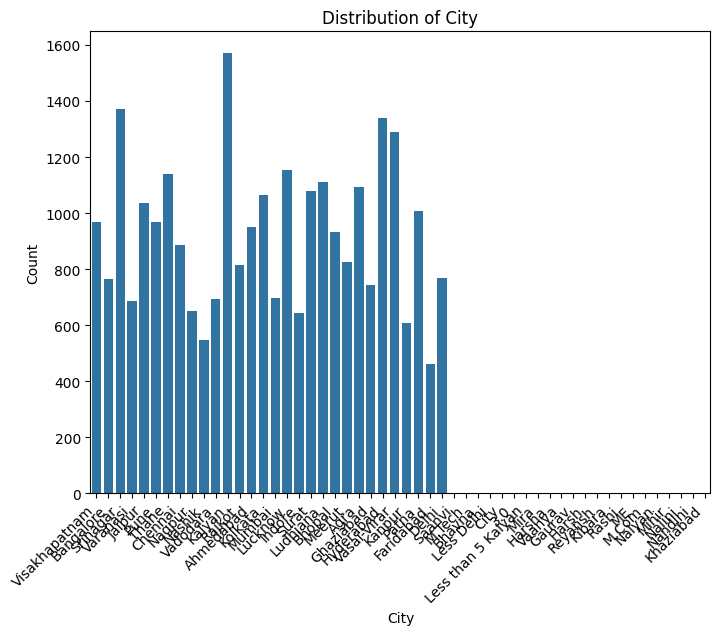

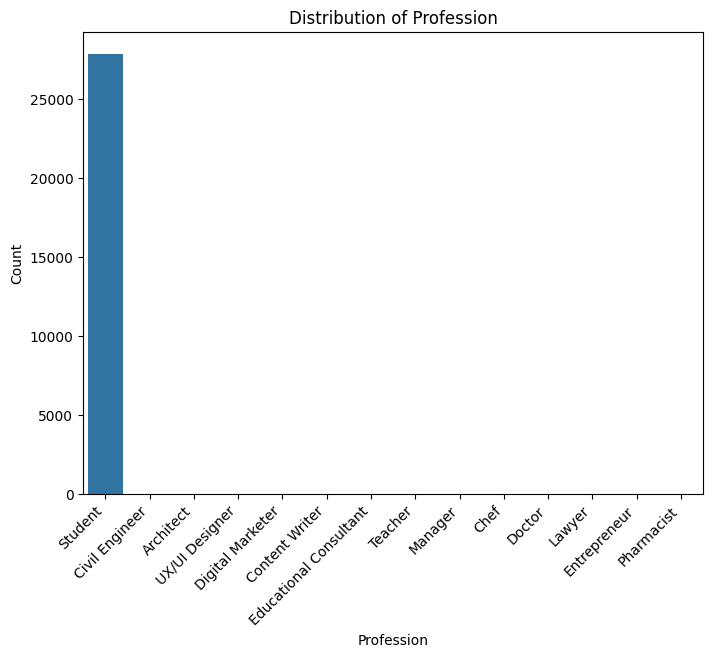

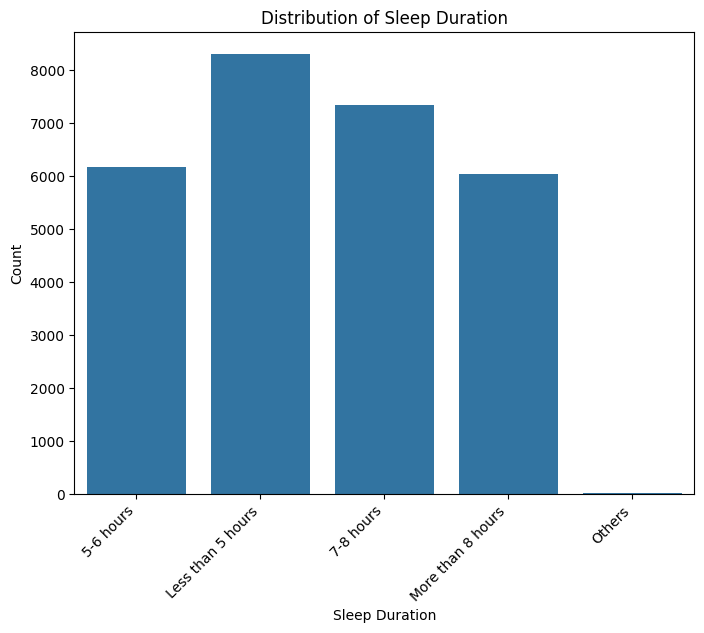

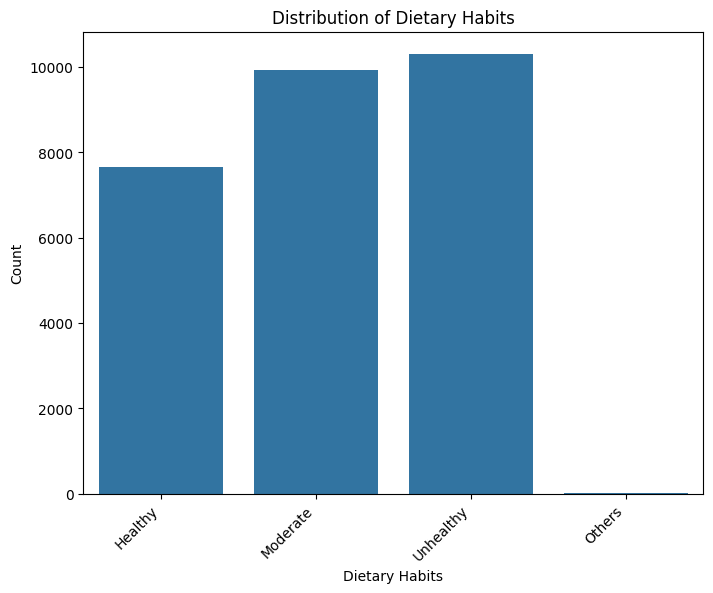

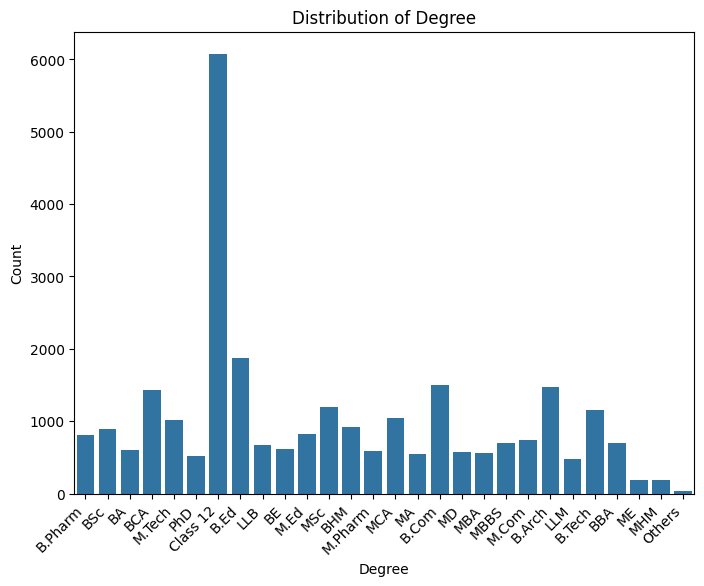

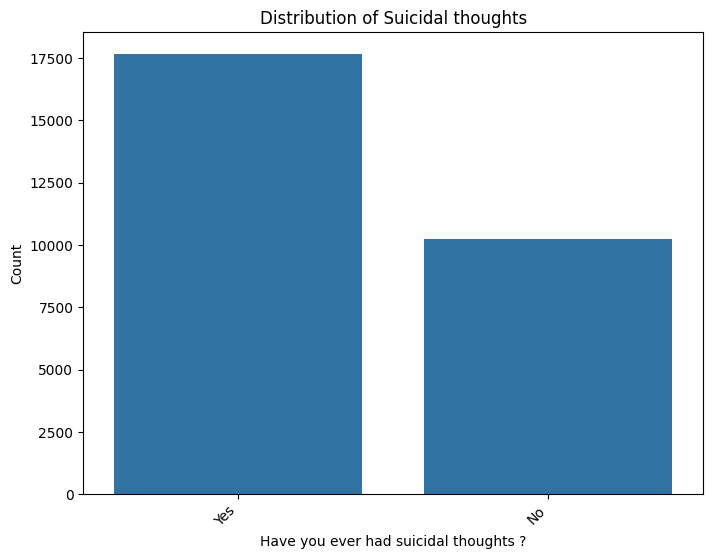

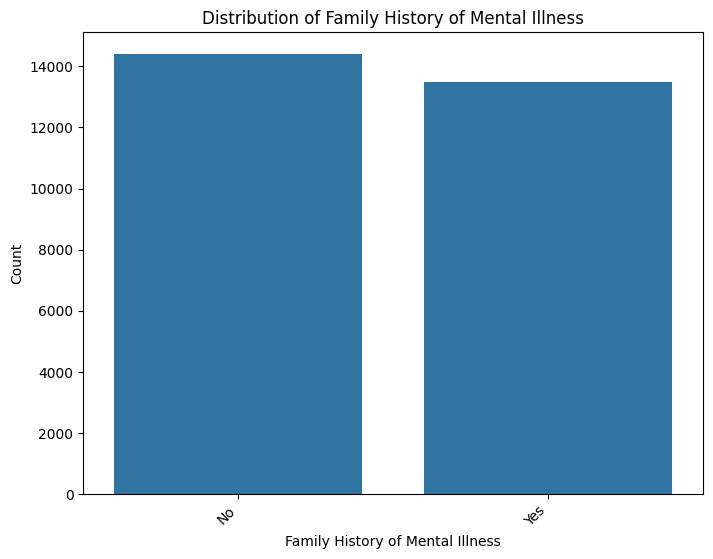

In [702]:
#categorical columns analysis
# Analyze categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    if col == 'Have you ever had suicidal thoughts ?':
        plt.title(f'Distribution of Suicidal thoughts')
    else:
      plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

OUTLIERS

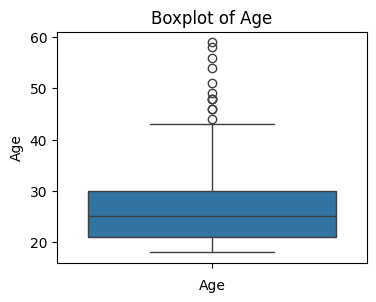

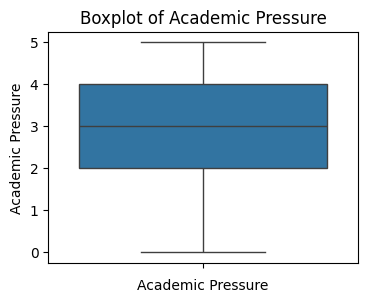

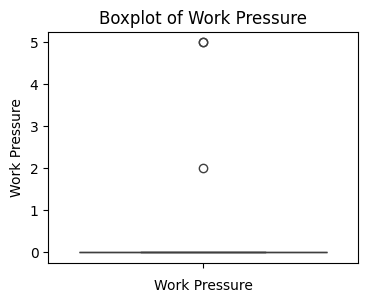

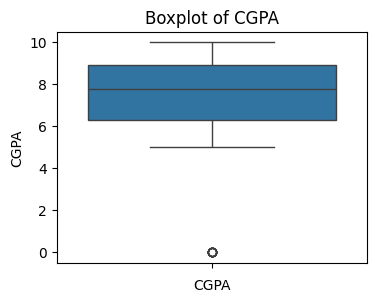

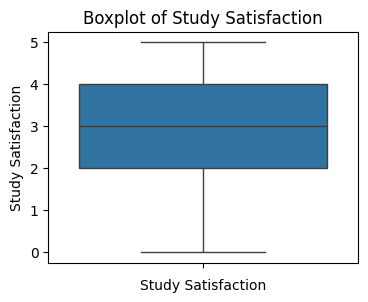

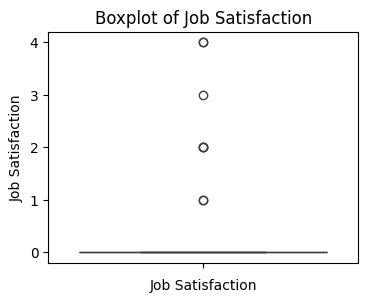

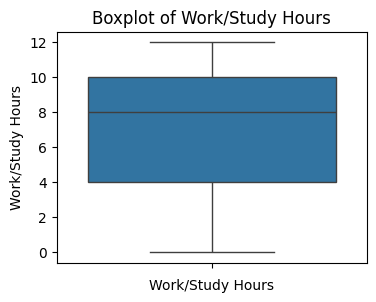

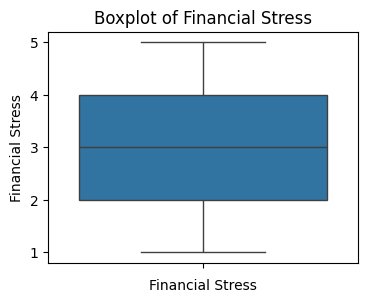

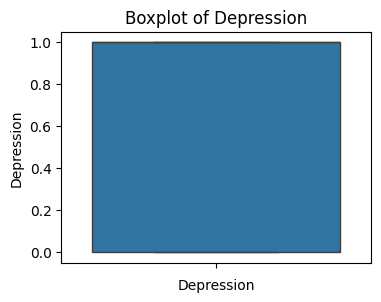

In [703]:
for col in numerical_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

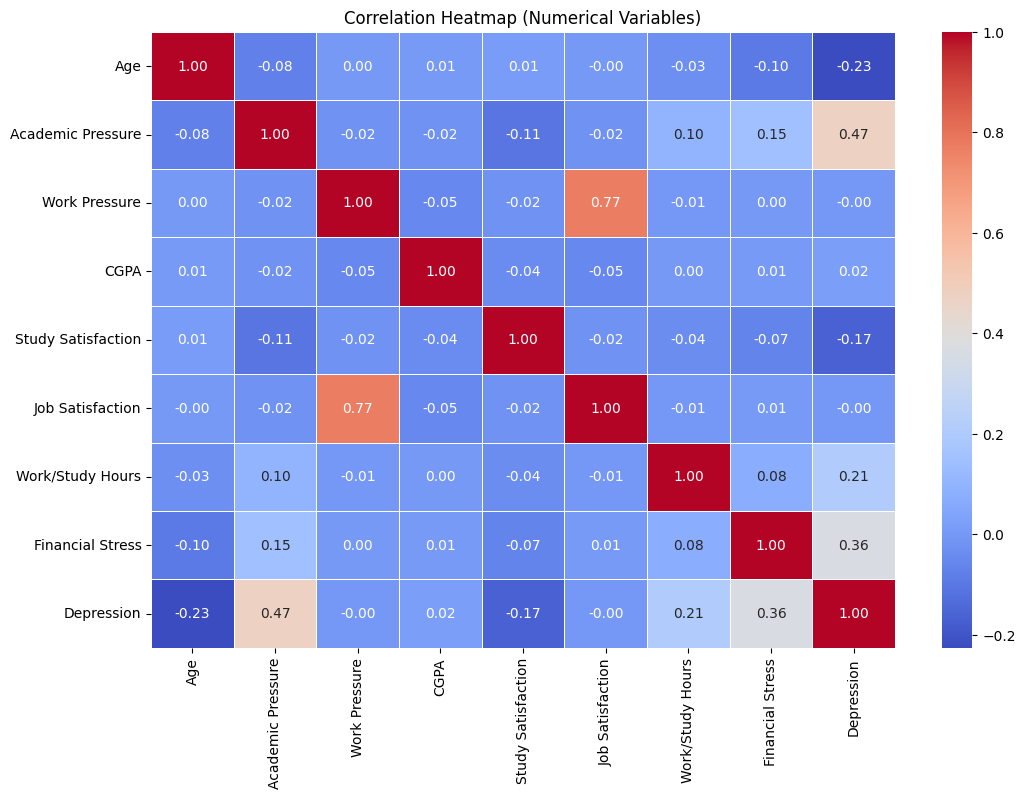

In [704]:
# Select only numerical columns from the dataframe
df_numerical = df[numerical_cols]

# Compute the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

Data Cleaning and Feature Engineering

In [705]:
df.dropna(subset=['Financial Stress'], inplace=True)

In [706]:
df.shape

(27898, 18)

In [707]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [709]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [710]:
df=df[df['Profession']=='Student']
df.shape

(27867, 18)

In [711]:

df = df.drop(['id'], axis=1)
df = df.drop(['City'], axis=1)
df = df.drop(['Profession'], axis=1)
df = df.drop(['Work Pressure'], axis=1)
df = df.drop(['Job Satisfaction'], axis=1)
df = df.drop(['Degree'], axis=1)

In [712]:
df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Yes,10.0,5.0,No,1


In [713]:

categorical_cols.remove('City')
categorical_cols.remove('Profession')
numerical_cols.remove('Work Pressure')
numerical_cols.remove('Job Satisfaction')
categorical_cols.remove('Degree')

In [714]:

print(numerical_cols)

['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']


In [715]:
print(categorical_cols)

['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [716]:
df.shape

(27867, 12)

In [717]:
df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Yes,10.0,5.0,No,1


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27867 non-null  object 
 1   Age                                    27867 non-null  float64
 2   Academic Pressure                      27867 non-null  float64
 3   CGPA                                   27867 non-null  float64
 4   Study Satisfaction                     27867 non-null  float64
 5   Sleep Duration                         27867 non-null  object 
 6   Dietary Habits                         27867 non-null  object 
 7   Have you ever had suicidal thoughts ?  27867 non-null  object 
 8   Work/Study Hours                       27867 non-null  float64
 9   Financial Stress                       27867 non-null  float64
 10  Family History of Mental Illness       27867 non-null  object 
 11  Depress

In [719]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,25.821007,3.140740,7.656084,2.943697,7.157534,3.139520,0.585172
std,4.906538,1.381637,1.470836,1.361183,3.707136,1.437289,0.492701
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [720]:
df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Yes,10.0,5.0,No,1


In [721]:
df['Age'].unique()

array([33., 24., 31., 28., 25., 29., 30., 27., 19., 20., 23., 18., 21.,
       22., 34., 32., 26., 39., 35., 42., 36., 58., 49., 38., 51., 44.,
       43., 46., 59., 54., 48., 56., 37., 41.])

What pd.cut() does

Converts a continuous numeric column (Age) into categorical groups.

Important parameters

df['Age']: The original numeric age values.

bins=bins: Defines how the ages are split.

labels=labels: Assigns names to each age interval.

right=False:

Means the intervals are left-inclusive and right-exclusive.

Example:

18 ≤ Age < 24 → '18-24'

24 ≤ Age < 29 → '25-29'

This avoids overlapping boundary values.

In [722]:
# Define binning ranges and labels for Age groups
bins = [18, 24, 29, 34, 39, 60]  # Age groups
labels = ['18-24', '25-29', '30-34', '35-39', '40-60']  # Age group labels

# Bin the 'Age' column and replace it with the corresponding Age group
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Rename the column 'Age' to 'Age Group'
df.rename(columns={'Age': 'Age Group'}, inplace=True)

In [723]:
numerical_cols.remove('Age')
categorical_cols.insert(1, 'Age Group')

In [724]:

print(numerical_cols)
print(categorical_cols)

['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
['Gender', 'Age Group', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


Convert CGPA into CGPA Groups

In [725]:
# Define the static groups for CGPA
cgpa_groups = {
    'Low CGPA': (0, 5),               # 0 to 5 (inclusive)
    'Below Average CGPA': (5, 6.5),   # 5 to 6.5 (inclusive 5, exclusive 6.5)
    'Average CGPA': (6.5, 8),         # 6.5 to 8 (inclusive 6.5, exclusive 8)
    'High CGPA': (8, 10.01)           # 8 to 10 (inclusive)
}

# Function to map CGPA into defined groups
def map_cgpa_to_group(cgpa):
    for group, (low, high) in cgpa_groups.items():
        if low <= cgpa < high:
            return group
    return 'Unknown'  # For any value outside the defined range

# Apply the function to the 'CGPA' column
df['CGPA'] = df['CGPA'].apply(map_cgpa_to_group)

# Rename the column 'CGPA' to 'CGPA Group'
df.rename(columns={'CGPA': 'CGPA Group'}, inplace=True)

In [726]:
numerical_cols.remove('CGPA')
categorical_cols.insert(2, 'CGPA Group')

In [727]:

print(numerical_cols)
print(categorical_cols)

['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
['Gender', 'Age Group', 'CGPA Group', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [728]:

# Map values in 'Gender' column: Male -> 0, Female -> 1
df['Gender'] = df['Gender'].map(gender_map)

# Map the age groups to numerical values
df['Age Group'] = df['Age Group'].map(age_group_map)
df['Age Group'] = df['Age Group'].astype('category').cat.codes

# Map the CGPA groups to numerical values
df['CGPA Group'] = df['CGPA Group'].map(cgpa_map)
df['CGPA Group'] = df['CGPA Group'].astype('category').cat.codes

# Map values in 'Sleep Duration' column to numerical values
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_map)

# Map values in 'Dietary Habits' column: Healthy -> 0, Moderate -> 1, Unhealthy -> 2, Other -> 3
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_map)

# Map values in 'Have you ever had suicidal thoughts ?' column: Yes -> 1, No -> 0
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(yes_no_map)

# Map values in 'Family History of Mental Illness' column: Yes -> 1, No -> 0
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(yes_no_map)

In [729]:
df.head()

,Gender,Age Group,Academic Pressure,CGPA Group,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,2,5.0,3,2.0,1,0,1,3.0,1.0,0,1
1,1,1,2.0,1,5.0,1,1,0,3.0,2.0,1,0
2,0,2,3.0,2,5.0,0,0,0,9.0,1.0,1,0
3,1,1,3.0,1,2.0,2,1,1,4.0,5.0,1,1
4,1,1,4.0,3,3.0,1,1,1,1.0,1.0,0,0


In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27867 non-null  int64  
 1   Age Group                              27867 non-null  int8   
 2   Academic Pressure                      27867 non-null  float64
 3   CGPA Group                             27867 non-null  int8   
 4   Study Satisfaction                     27867 non-null  float64
 5   Sleep Duration                         27867 non-null  int64  
 6   Dietary Habits                         27867 non-null  int64  
 7   Have you ever had suicidal thoughts ?  27867 non-null  int64  
 8   Work/Study Hours                       27867 non-null  float64
 9   Financial Stress                       27867 non-null  float64
 10  Family History of Mental Illness       27867 non-null  int64  
 11  Depress

In [731]:
df.describe()

,Gender,Age Group,Academic Pressure,CGPA Group,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,0.442782,1.029174,3.140740,2.173216,2.943697,1.400438,1.096709,0.632684,7.157534,3.139520,0.483870,0.585172
std,0.496724,0.922639,1.381637,0.838603,1.361183,1.128259,0.797712,0.482082,3.707136,1.437289,0.499749,0.492701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,4.000000,5.000000,3.000000,5.000000,4.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [732]:
numerical_cols

['Academic Pressure',
 'Study Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [733]:
categorical_cols

['Gender',
 'Age Group',
 'CGPA Group',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

Post-Engineering Exploratory Data Analysis (EDA)

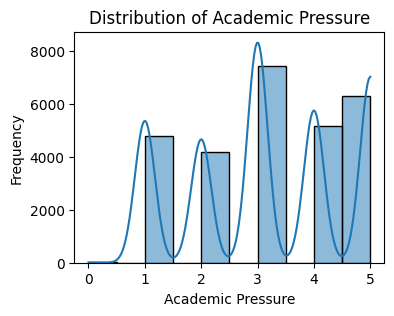

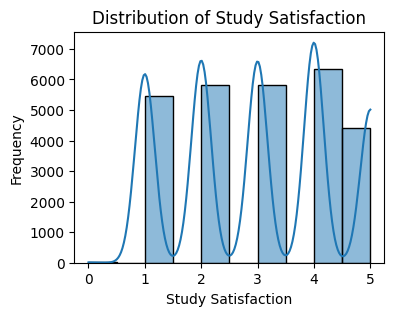

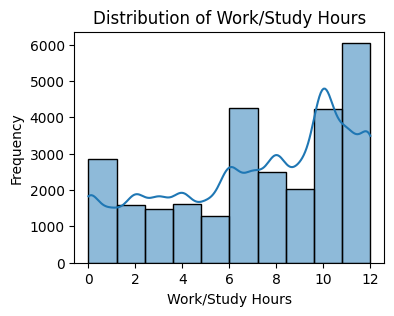

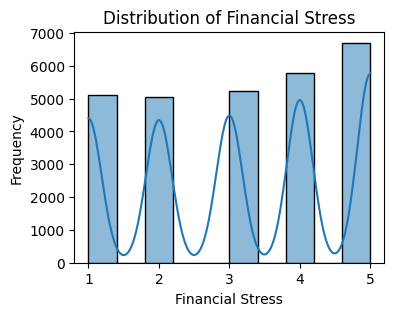

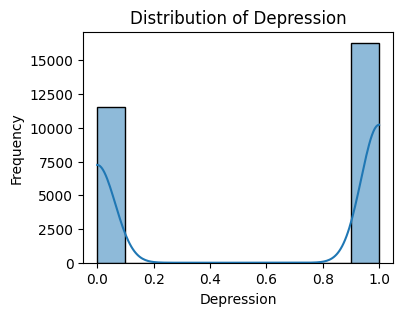

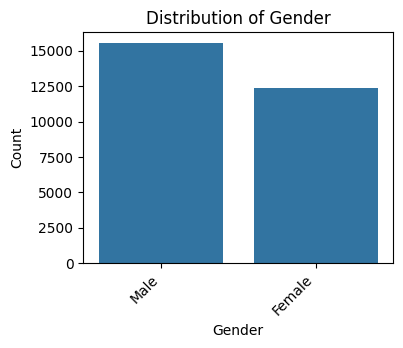

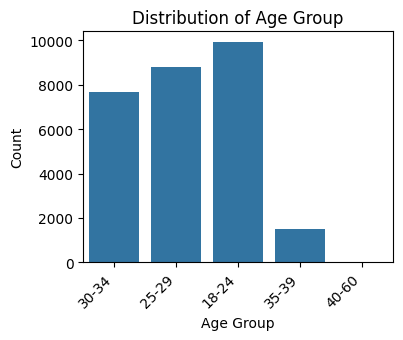

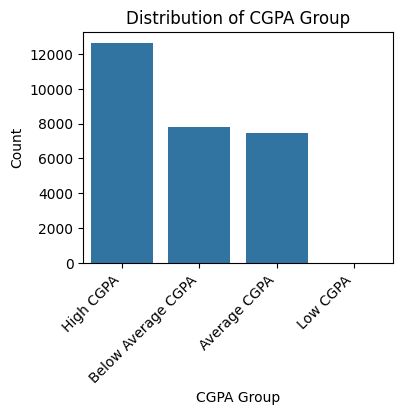

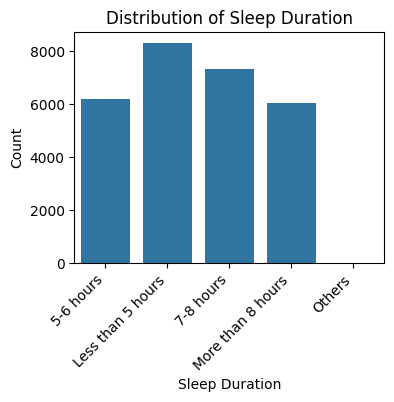

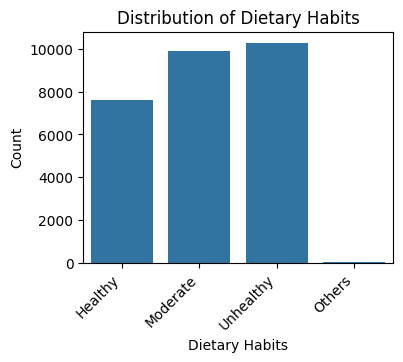

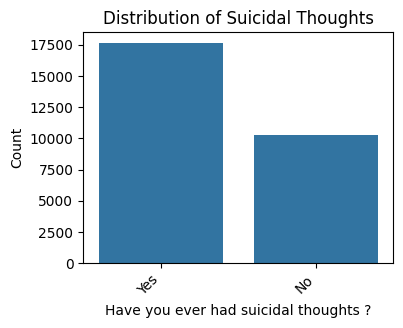

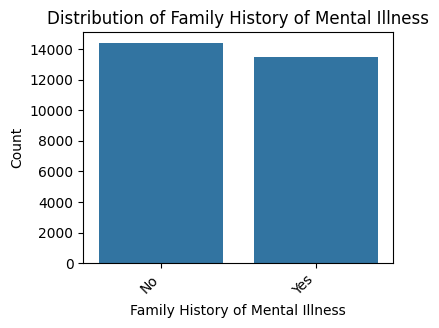

In [734]:
# Plot distributions of numerical variables
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Reverse mappings for visualization
reverse_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Age Group': {0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-60'},
    'CGPA Group': {0: 'Low CGPA', 1: 'Below Average CGPA', 2: 'Average CGPA', 3: 'High CGPA'},
    'Sleep Duration': {0: 'Less than 5 hours', 1: '5-6 hours', 2: '7-8 hours', 3: 'More than 8 hours', 4: 'Others'},
    'Dietary Habits': {0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy', 3: 'Others'},
    'Have you ever had suicidal thoughts ?': {1: 'Yes', 0: 'No'},
    'Family History of Mental Illness': {1: 'Yes', 0: 'No'}
}

# Analyze categorical variables
for col in categorical_cols:
    plt.figure(figsize=(4, 3))

    # Replace numerical values with original categories for visualization
    if col in reverse_mappings:
        temp_df = df.copy()
        temp_df[col] = temp_df[col].map(reverse_mappings[col])
        sns.countplot(x=col, data=temp_df)
    else:
        sns.countplot(x=col, data=df)

    # Customize title for suicidal thoughts
    if col == 'Have you ever had suicidal thoughts ?':
        plt.title('Distribution of Suicidal Thoughts')
    else:
        plt.title(f'Distribution of {col}')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Model Training

In [735]:
X = df[['Gender', 'Age Group', 'Academic Pressure', 'CGPA Group', 'Study Satisfaction', 'Sleep Duration',
                     'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress',
                     'Family History of Mental Illness']]
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [736]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [737]:
models = {

    # ---------------- Logistic Regression ---------------- #
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        penalty='l2'
    ),

    # ---------------- KNN (Euclidean, Ball Tree, KD Tree) ---------------- #
    'KNN (Euclidean)': KNeighborsClassifier(
        n_neighbors=5,
        metric='euclidean',
        algorithm='auto'
    ),

    'KNN (Ball Tree)': KNeighborsClassifier(
        n_neighbors=5,
        metric='euclidean',
        algorithm='ball_tree'
    ),

    'KNN (KD Tree)': KNeighborsClassifier(
        n_neighbors=5,
        metric='euclidean',
        algorithm='kd_tree'
    ),

    # ---------------- Decision Tree ---------------- #
    'Decision Tree': DecisionTreeClassifier(
        criterion='gini',        # or 'entropy'
        max_depth=10,            # controls overfitting
        min_samples_split=5,     # minimum samples to split
        min_samples_leaf=2,      # minimum samples per leaf
        random_state=42
    ),

    # ---------------- Random Forest ---------------- #
    'Random Forest': RandomForestClassifier(
        n_estimators=200,        # number of trees
        criterion='gini',        # or 'entropy'
        max_depth=15,            # controls complexity
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',     # feature selection per split
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ),

    # ---------------- Naive Bayes ---------------- #
    'Naive Bayes (Gaussian)': GaussianNB(),

    # ---------------- AdaBoost ---------------- #
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.8,
        random_state=42
    )
}


In [738]:
from sklearn.metrics import accuracy_score, classification_report

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)*100
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 85.00179404377467
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2243
           1       0.86      0.89      0.88      3331

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574


KNN (Euclidean)
Accuracy: 80.57050592034446
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      2243
           1       0.82      0.86      0.84      3331

    accuracy                           0.81      5574
   macro avg       0.80      0.79      0.80      5574
weighted avg       0.80      0.81      0.80      5574


KNN (Ball Tree)
Accuracy: 80.74991029781127
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2243
           1       0.82      0.86      0.84      3331

    accuracy                           0.81

In [739]:
results

{'Logistic Regression': 85.00179404377467,
 'KNN (Euclidean)': 80.57050592034446,
 'KNN (Ball Tree)': 80.74991029781127,
 'KNN (KD Tree)': 80.57050592034446,
 'Decision Tree': 81.77251524937208,
 'Random Forest': 84.35593828489415,
 'Naive Bayes (Gaussian)': 83.78184427700036,
 'AdaBoost': 84.8762109795479}

In [740]:
from sklearn.metrics import accuracy_score

best_model = None
best_accuracy = 0
best_model_name = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name


In [741]:
print("Best Model:", best_model_name)
print("Best Accuracy:", best_accuracy)


Best Model: Logistic Regression
Best Accuracy: 0.8500179404377467


In [742]:
import joblib

joblib.dump(best_model, 'depression_model.joblib')


['depression_model.joblib']